In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob # useful for listing files in directory

import librosa # good for audio data
import librosa.display
import IPython.display as ipd

from itertools import cycle


In [ ]:
'''
Frequency - measured in Hz. Describes differences in wave lengths (peaks)
Intensity - measured in db/power. "Loudness". Describes amplitude (height) of the wave
Sample rate - how discrete observations of audio are (not continuous). "Resolution" of audio file

Many diff audio files: mp3, wav, m4a, flac, ogg
'''



In [3]:
audio_files = glob('/kaggle/input/ravdess-emotional-speech-audio/*/*.wav')

In [4]:
audio_files

['/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-02-01-02-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-01-02-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-02-02-01-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-04-01-02-01-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-02-01-01-02-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-01-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-02-02-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-05-01-01-02-02.wav',
 '/k

In [5]:
# Play audio file
ipd.Audio(audio_files[0])

In [9]:
y, sr = librosa.load(audio_files[0]) # y is raw data, sr is sample rate (int)
print(f'Raw data {y[:10]}')
print(f'sr: {sr}')

Raw data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
sr: 22050


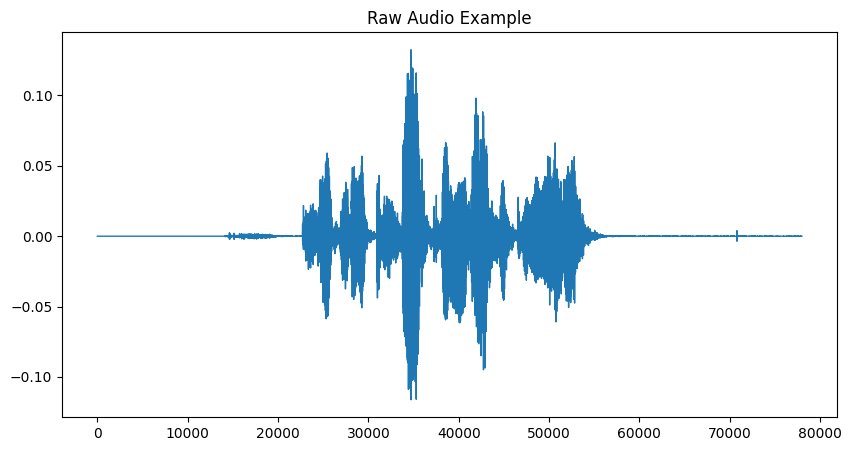

In [11]:
pd.Series(y).plot(figsize=(10,5), lw=1, title="Raw Audio Example")
plt.show()

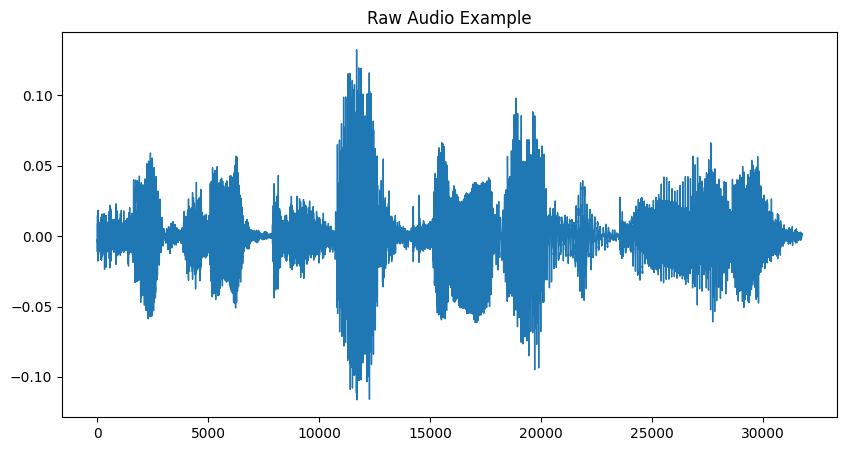

In [14]:
# Librosa allows us to apply effects to audio! Eg. trimming
y_trimmed, _ = librosa.effects.trim(y, top_db=20) # Note, to zoom in on particular section of y...can do y[3000:3100]
pd.Series(y_trimmed).plot(figsize=(10,5), lw=1, title="Raw Audio Example")
plt.show()

In [16]:
# I want to look at different frequencies based on power
# Can do this via Fourier Transform -> shows which freq at diff parts of audio file

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [17]:
S_db.shape

(1025, 153)

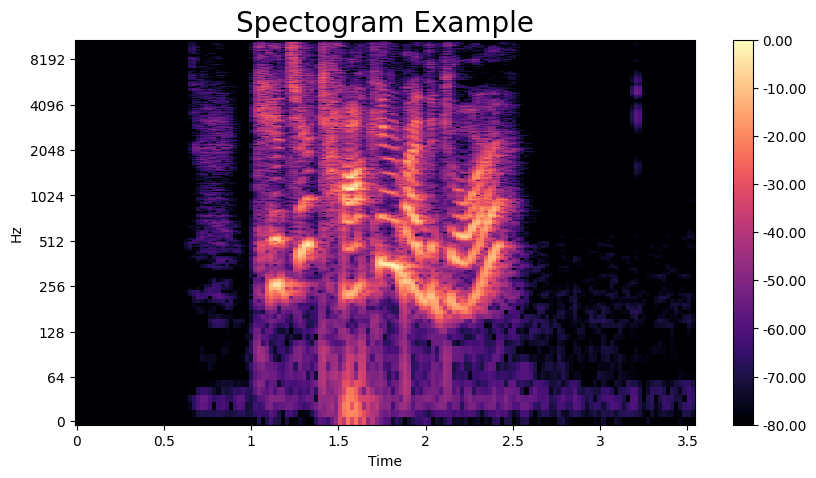

In [20]:
# Plot transformed audio data via spectogram (this is what you would feed into ML model)
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time',
                                      y_axis='log',
                                    ax =ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')

In [24]:
# Mel spectogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

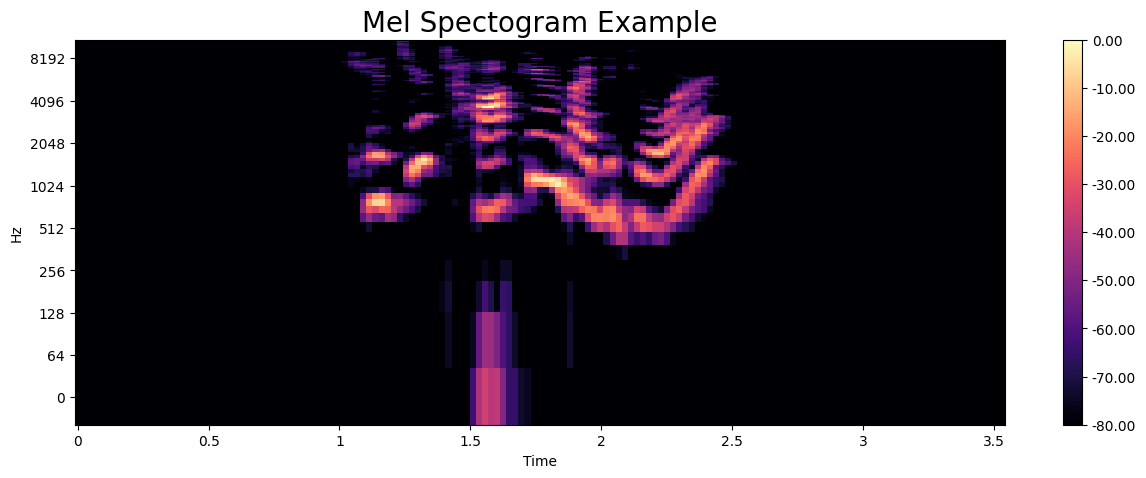

In [26]:
# Plot transformed audio data via spectogram (this is what you would feed into ML model)
fig, ax = plt.subplots(figsize=(15,5))
img = librosa.display.specshow(S_db_mel, x_axis='time',
                                      y_axis='log',
                                    ax =ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')